Model Evaluation:


Logistic Regression:
Accuracy: 0.7068965517241379
Precision: 0.5789473684210527
Recall: 0.55
F1 Score: 0.5641025641025641

Decision Tree:
Accuracy: 0.7758620689655172
Precision: 0.6458333333333334
Recall: 0.775
F1 Score: 0.7045454545454546


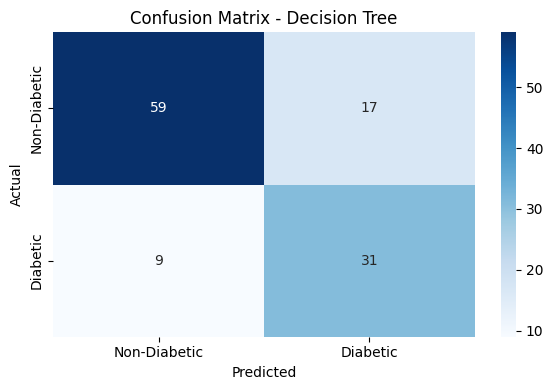

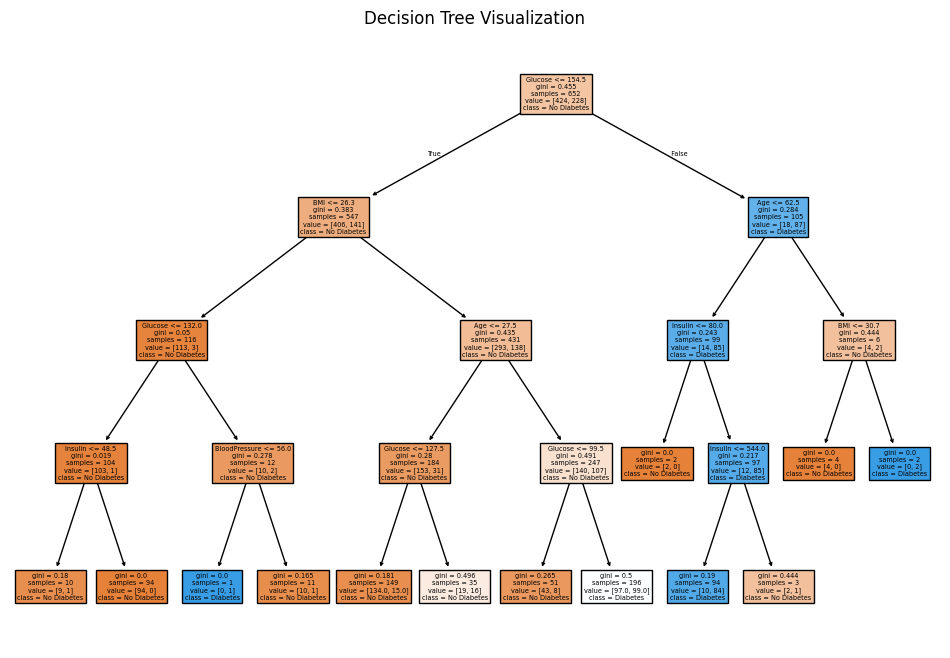

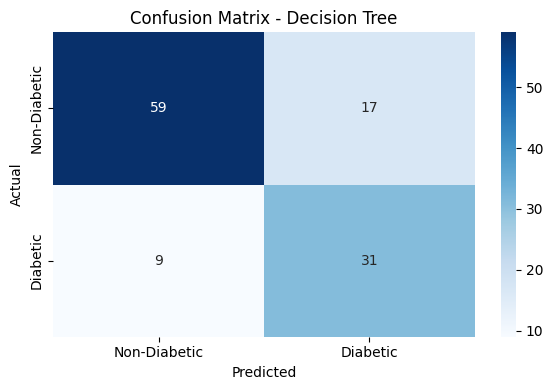

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os  # 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
           "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv(url, names=columns)

# Replace 0s with NaN in selected features
cols_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# Fill missing values with median
df.fillna(df.median(), inplace=True)

# Split into features and labels
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Decision Tree
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Metrics Comparison
models = {
    "Logistic Regression": y_pred_log,
    "Decision Tree": y_pred_tree
}

print("Model Evaluation:\n")
for name, preds in models.items():
    print(f"\n{name}:")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Precision:", precision_score(y_test, preds))
    print("Recall:", recall_score(y_test, preds))
    print("F1 Score:", f1_score(y_test, preds))

# Confusion Matrix for Decision Tree
cm = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# ✅ Make sure directories exist before saving
os.makedirs("models", exist_ok=True)
os.makedirs("visuals", exist_ok=True)

# Save models
joblib.dump(log_model, 'models/logistic_model.pkl')
joblib.dump(tree_model, 'models/decision_tree_model.pkl')

# Save last figure (Decision Tree Confusion Matrix)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("visuals/confusion_matrix.png", dpi=300)
